In [29]:
import cantera as ct 

gas = ct.Solution('gri30.yaml')

In [30]:

Tfuel = 600
pressure = 1.0 * ct.one_atm
fuel = 'CH4:1.0'
gas.TPX = Tfuel, pressure, fuel
Yfuel = gas.Y

In [31]:
Yfuel

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [1]:
# from ember import *
import matplotlib.pyplot as plt

output = 'run/ex_diffusion1'


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cantera as ct

In [9]:
gas = ct.Solution('gri30.yaml')

In [3]:
struct_file = '../../../run/ex_diffusion1/profNow.h5'

struct = h5py.File(struct_file, 'r')


In [4]:
keys = list(struct.keys())
keys

['P',
 'T',
 'U',
 'V',
 'Y',
 'a',
 'dTdtConv',
 'dTdtCross',
 'dTdtDiff',
 'dTdtProd',
 'dUdtConv',
 'dUdtDiff',
 'dUdtProd',
 'dWdt',
 'dYdtConv',
 'dYdtCross',
 'dYdtDiff',
 'dYdtProd',
 'dadt',
 'drhodt',
 'fileNumber',
 'gridAlpha',
 'q',
 'rho',
 't',
 'x']

In [10]:
# get x, T, Y
x = struct['x'][:]
Y = struct['Y'][:]
V = struct['V'][:]
T = struct['T'][:]
rho = struct['rho'][:]


# get index for CH4, O2, N2, H2O, CO2, CO
names = gas.species_names
ch4_index = names.index('CH4')
o2_index = names.index('O2')
n2_index = names.index('N2')
h2o_index = names.index('H2O')
co2_index = names.index('CO2')
co_index = names.index('CO')


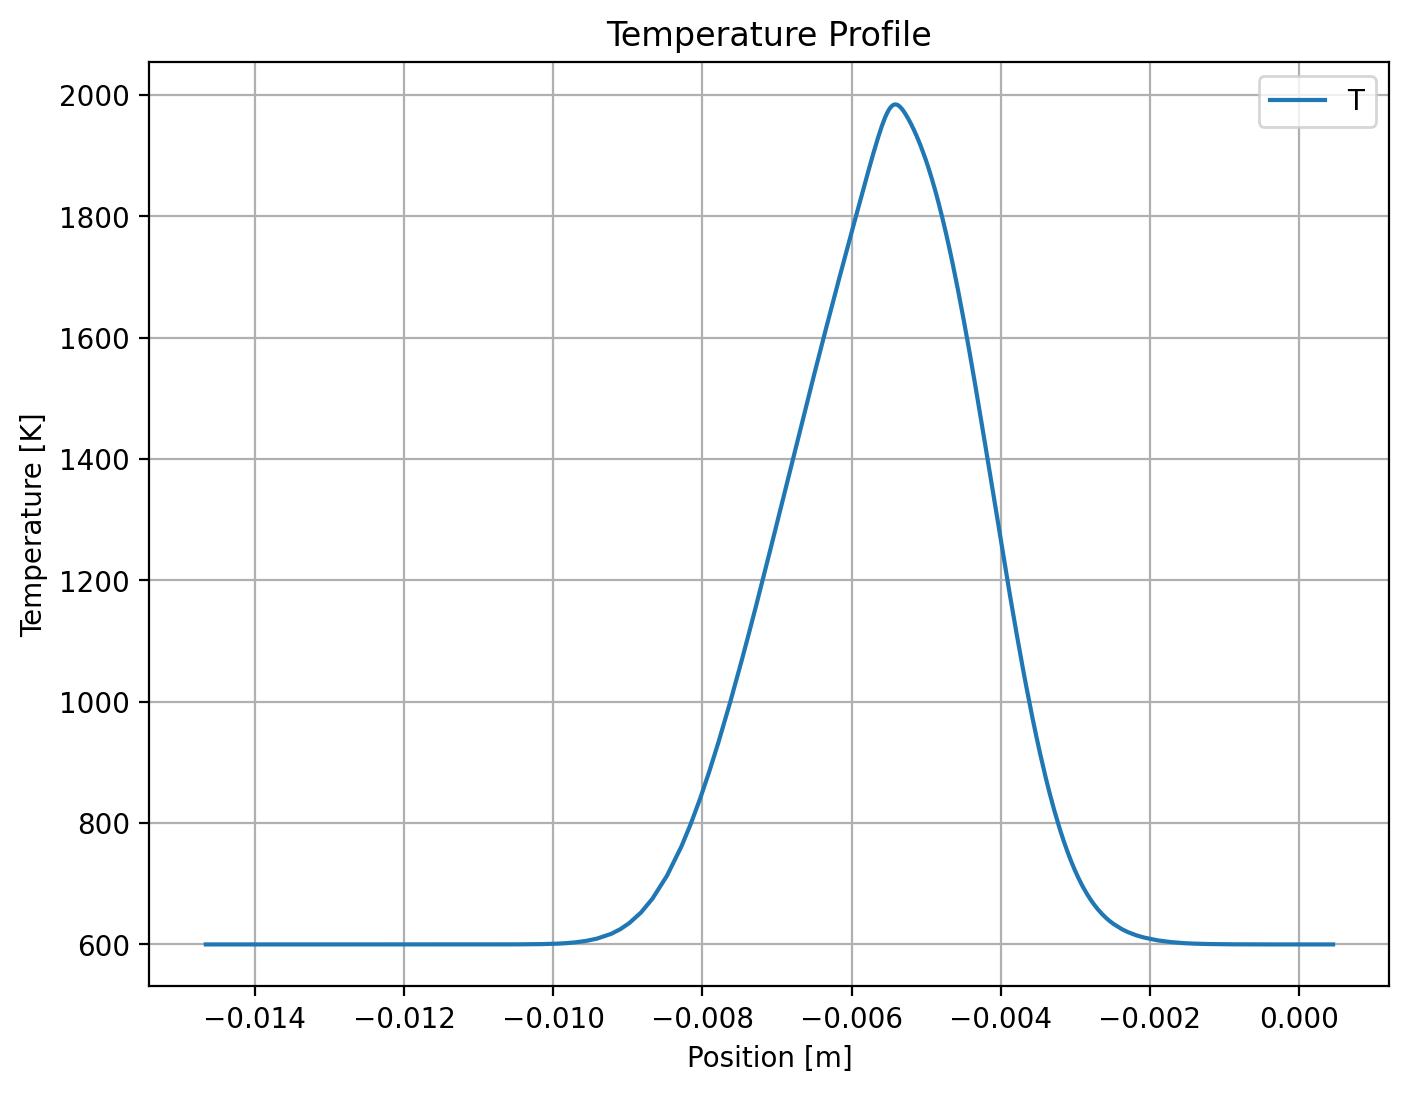

In [11]:
# plot the temperature profile 
fig = plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, T, label='T')
plt.xlabel('Position [m]')
plt.ylabel('Temperature [K]')
plt.title('Temperature Profile')
plt.legend()
plt.grid()

plt.show()


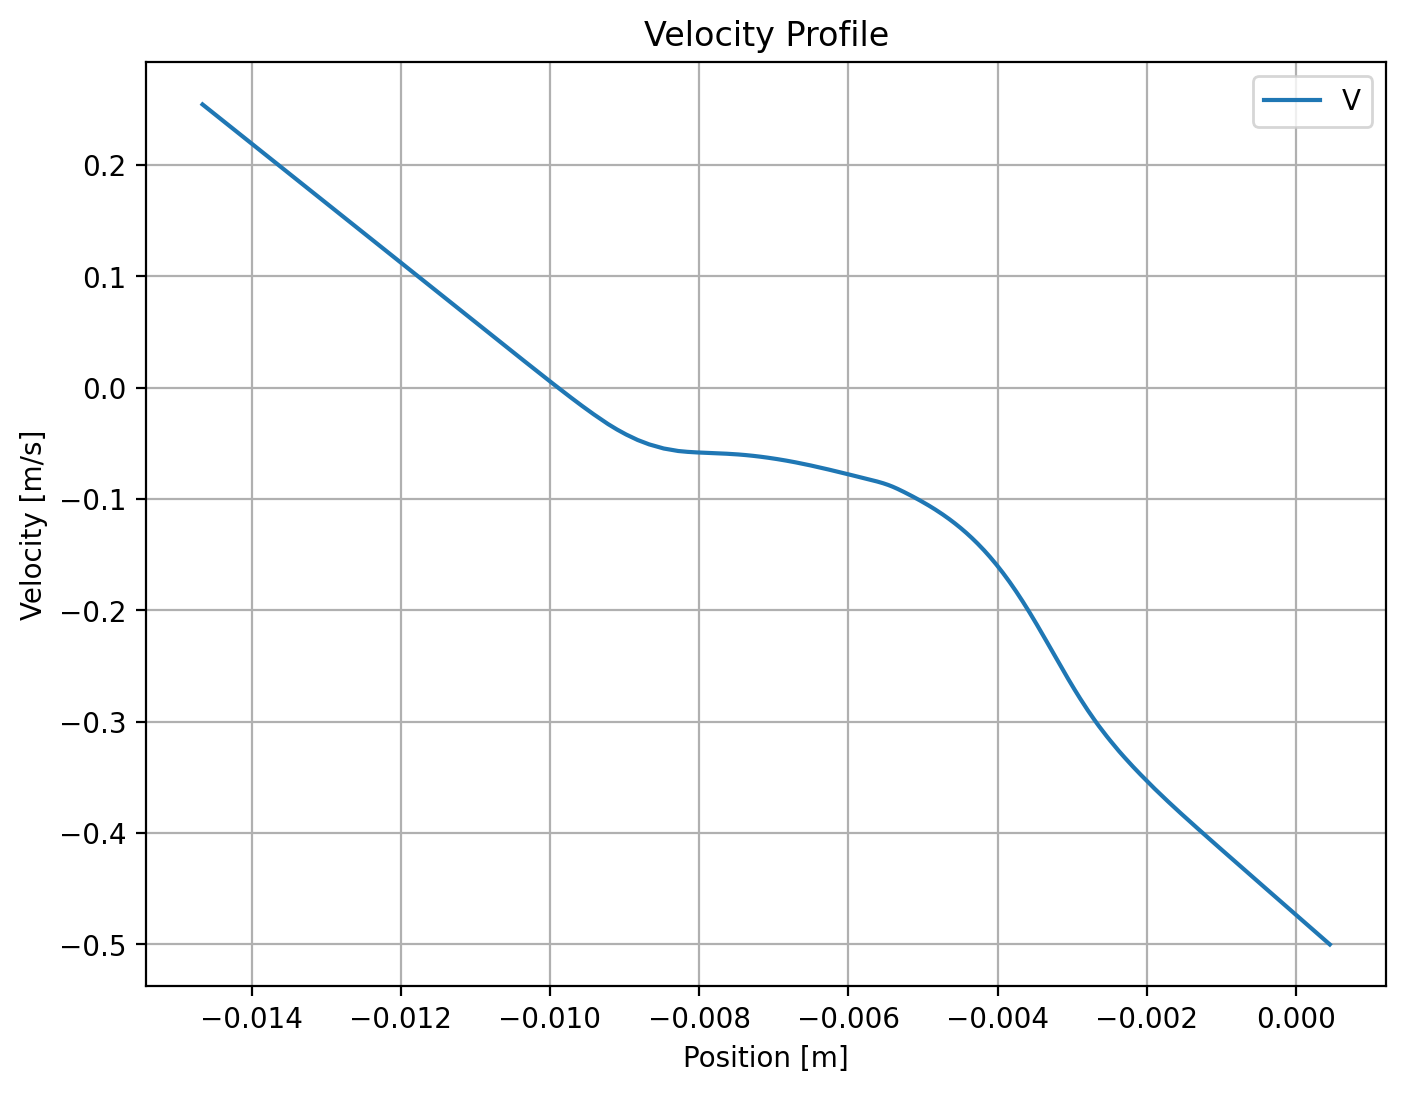

In [12]:
# plot the velocity profile
fig = plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, V, label='V')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity Profile')
plt.legend()
plt.grid()

plt.show()

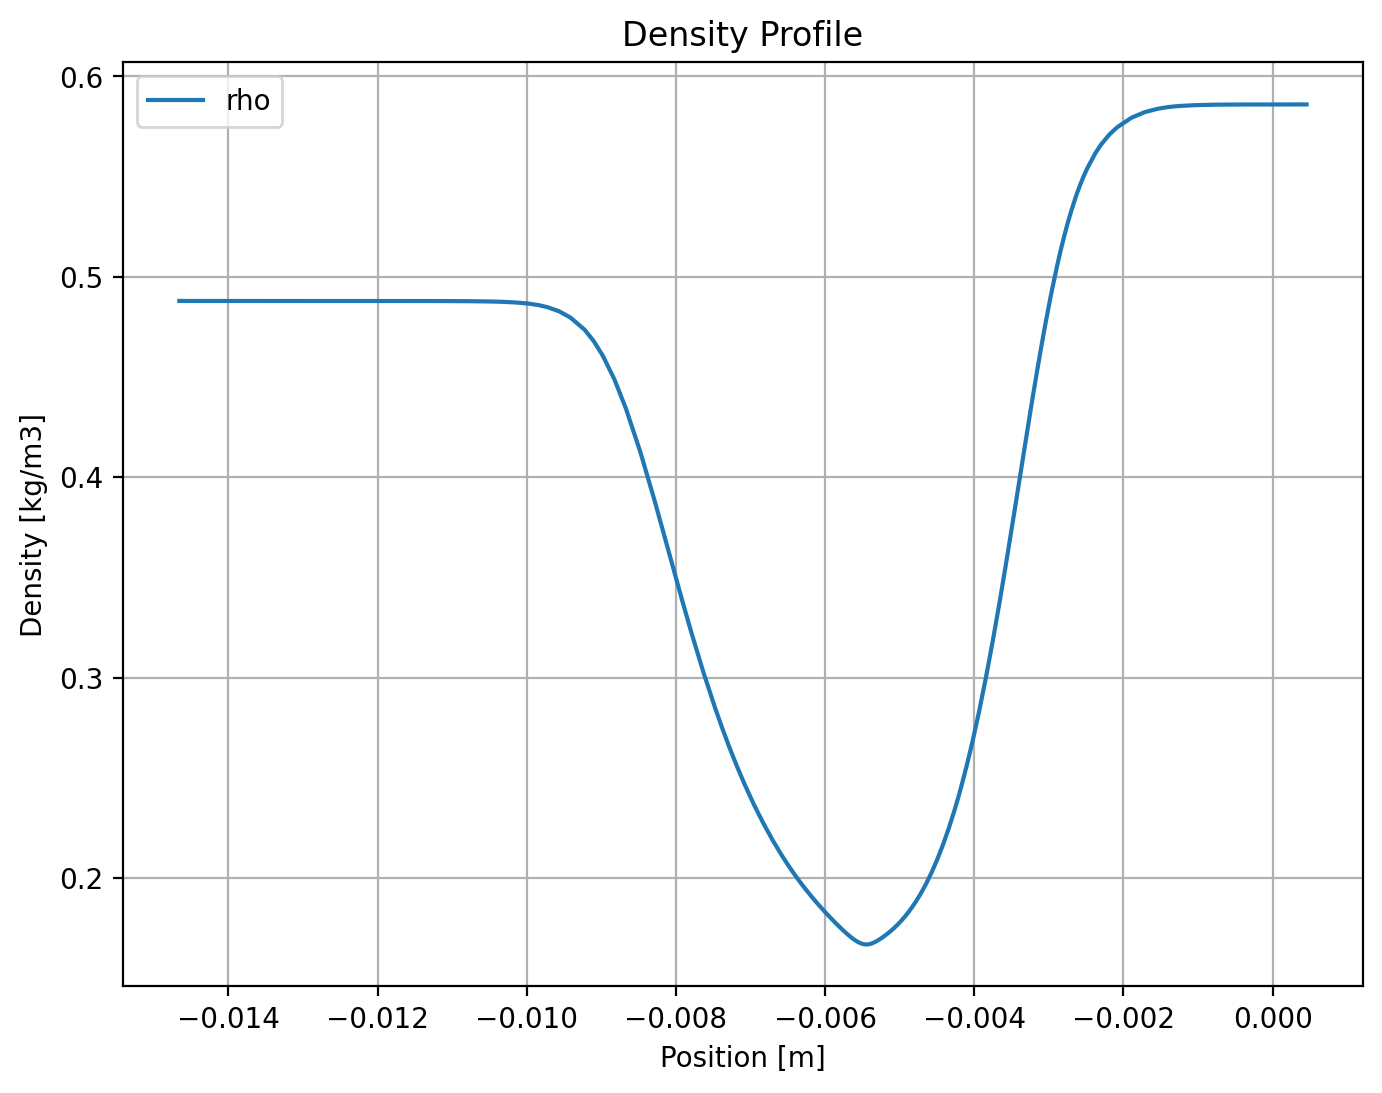

In [13]:
# plot the density profile
fig = plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, rho, label='rho')
plt.xlabel('Position [m]')
plt.ylabel('Density [kg/m3]')
plt.title('Density Profile')
plt.legend()
plt.grid()

plt.show()

In [15]:
Y.shape

(53, 195)

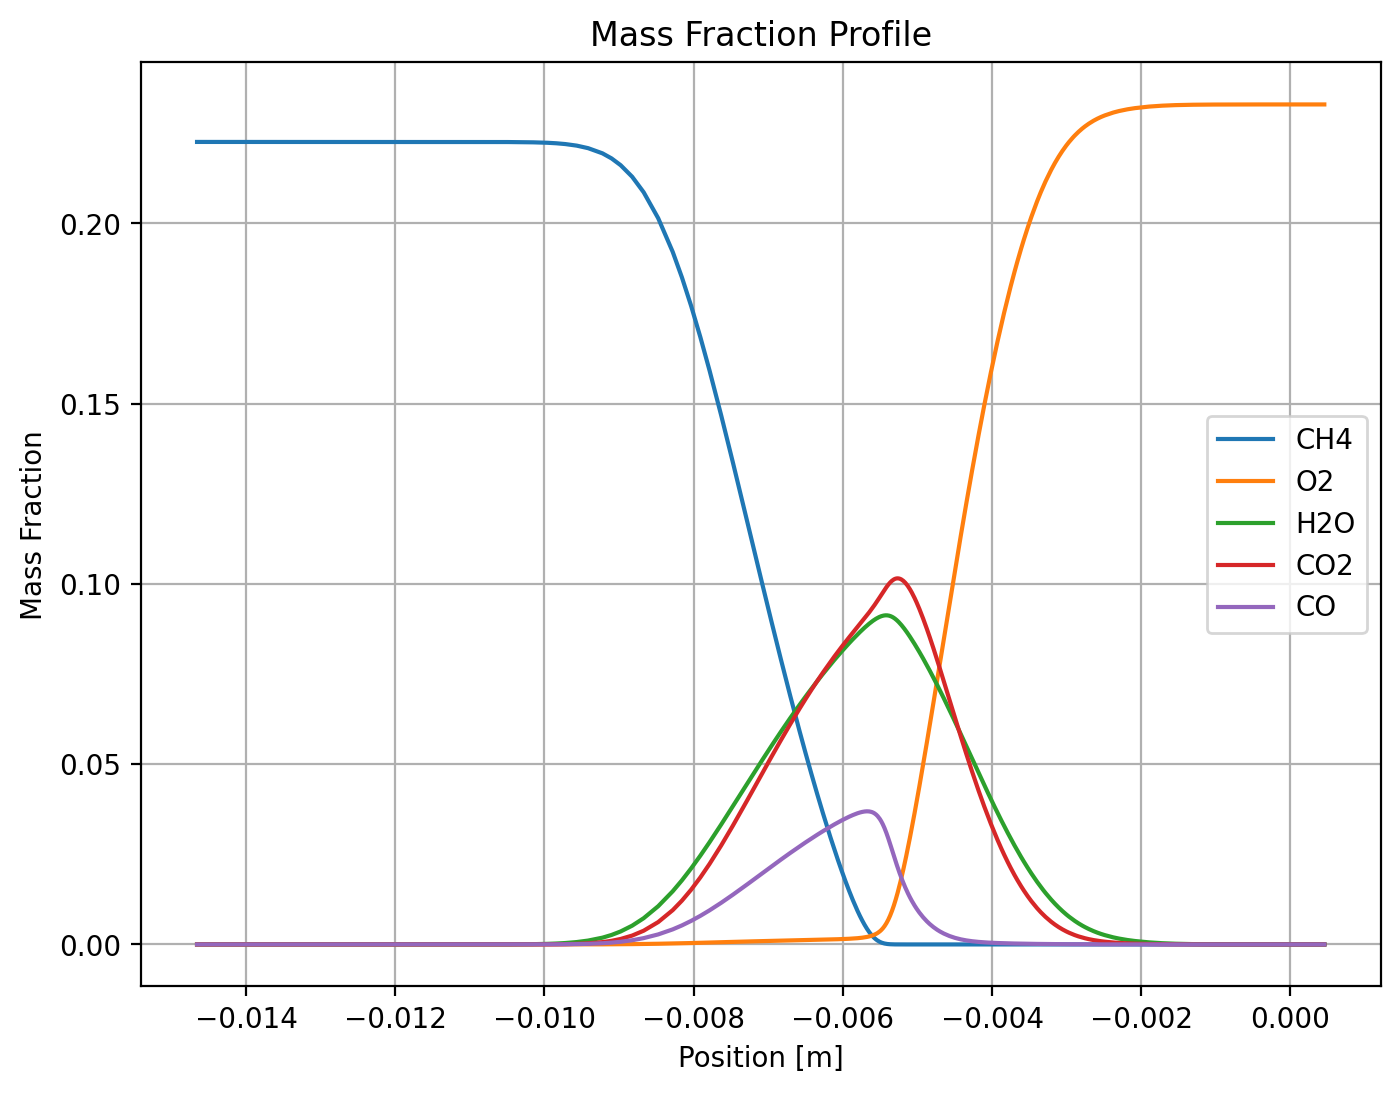

In [17]:
# plot the mass fraction profile of CH4, O2, N2, H2O, CO2, CO
fig = plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, Y[ch4_index, :], label='CH4')
plt.plot(x, Y[o2_index, :], label='O2')
# plt.plot(x, Y[n2_index, :], label='N2')
plt.plot(x, Y[h2o_index, :], label='H2O')
plt.plot(x, Y[co2_index, :], label='CO2')
plt.plot(x, Y[co_index, :], label='CO')

plt.xlabel('Position [m]')
plt.ylabel('Mass Fraction')
plt.title('Mass Fraction Profile')

plt.legend()

plt.grid()

plt.show()

In [22]:
def plot_analysis(struct_file, species_to_plot, species_index):
    struct = h5py.File(struct_file, 'r')
    x = struct['x'][:]
    Y = struct['Y'][:]
    V = struct['V'][:]
    T = struct['T'][:]
    rho = struct['rho'][:]
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 20), dpi=200)
    
    ax1.plot(x, T, label='T')
    ax1.set_xlabel('Position [m]')
    ax1.set_ylabel('Temperature [K]')
    ax1.set_title('Temperature Profile')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(x, V, label='V')
    ax2.set_xlabel('Position [m]')
    ax2.set_ylabel('Velocity [m/s]')
    ax2.set_title('Velocity Profile')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(x, rho, label='rho')
    ax3.set_xlabel('Position [m]')
    ax3.set_ylabel('Density [kg/m3]')
    ax3.set_title('Density Profile')
    ax3.legend()
    
    ax3.grid()
    
    for i, index in enumerate(species_index):
        ax4.plot(x, Y[index, :], label=species_to_plot[i])  
    ax4.set_xlabel('Position [m]')
    ax4.set_ylabel('Mass Fraction')
    ax4.set_title('Mass Fraction Profile')
    ax4.legend()
    
    ax4.grid()
    
    plt.show()
    

In [28]:
0.008/5e-4

16.0

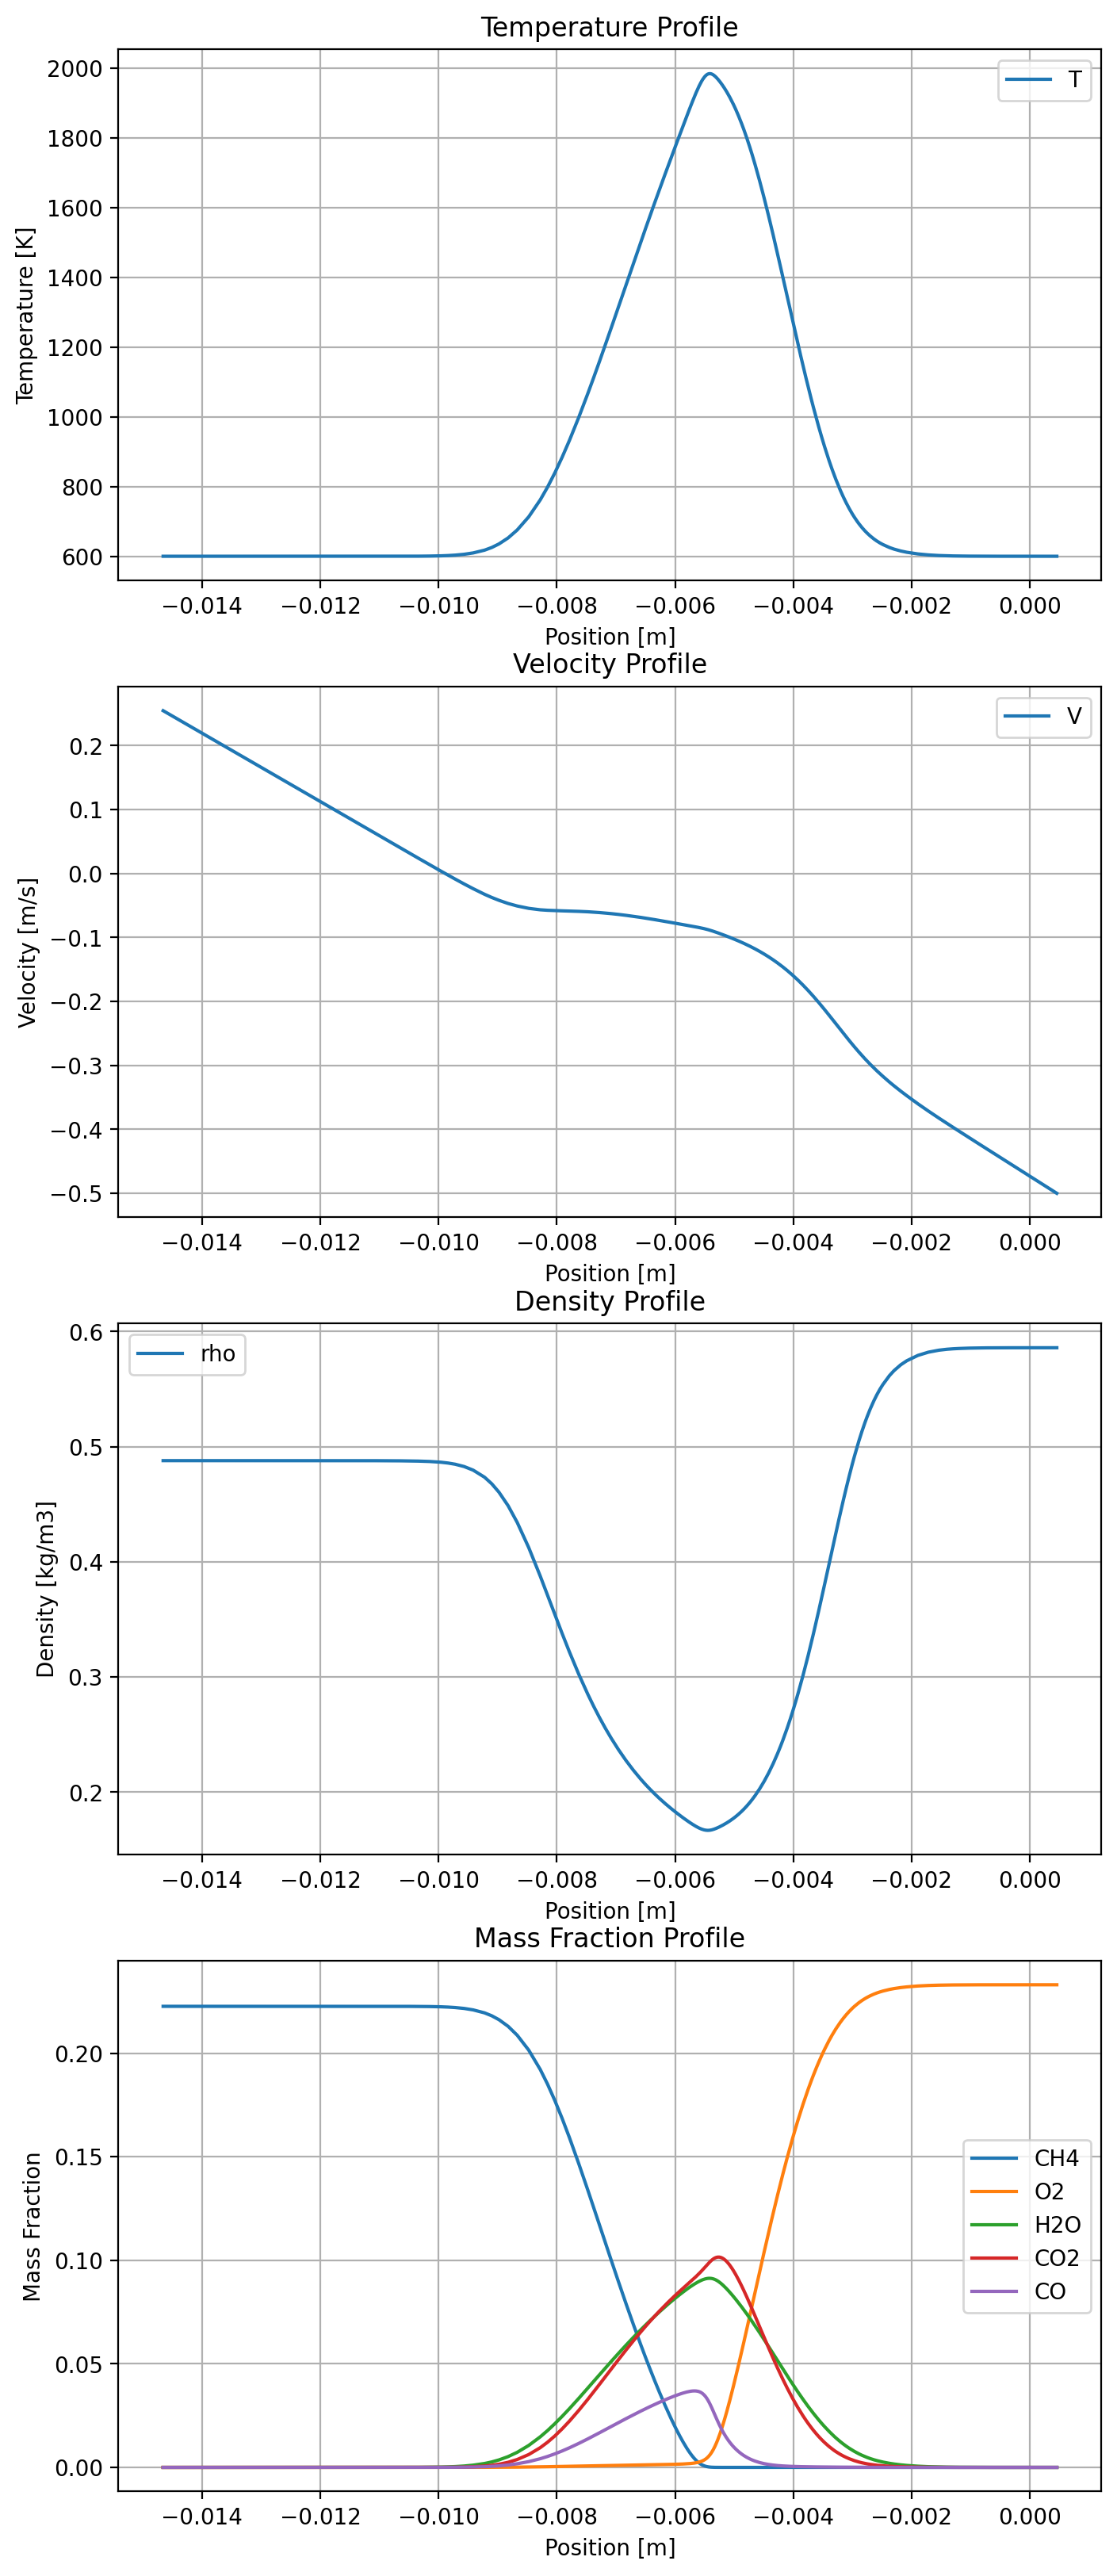

In [23]:
plot_analysis(struct_file, ['CH4', 'O2', 'H2O', 'CO2', 'CO'], [ch4_index, o2_index, h2o_index, co2_index, co_index])

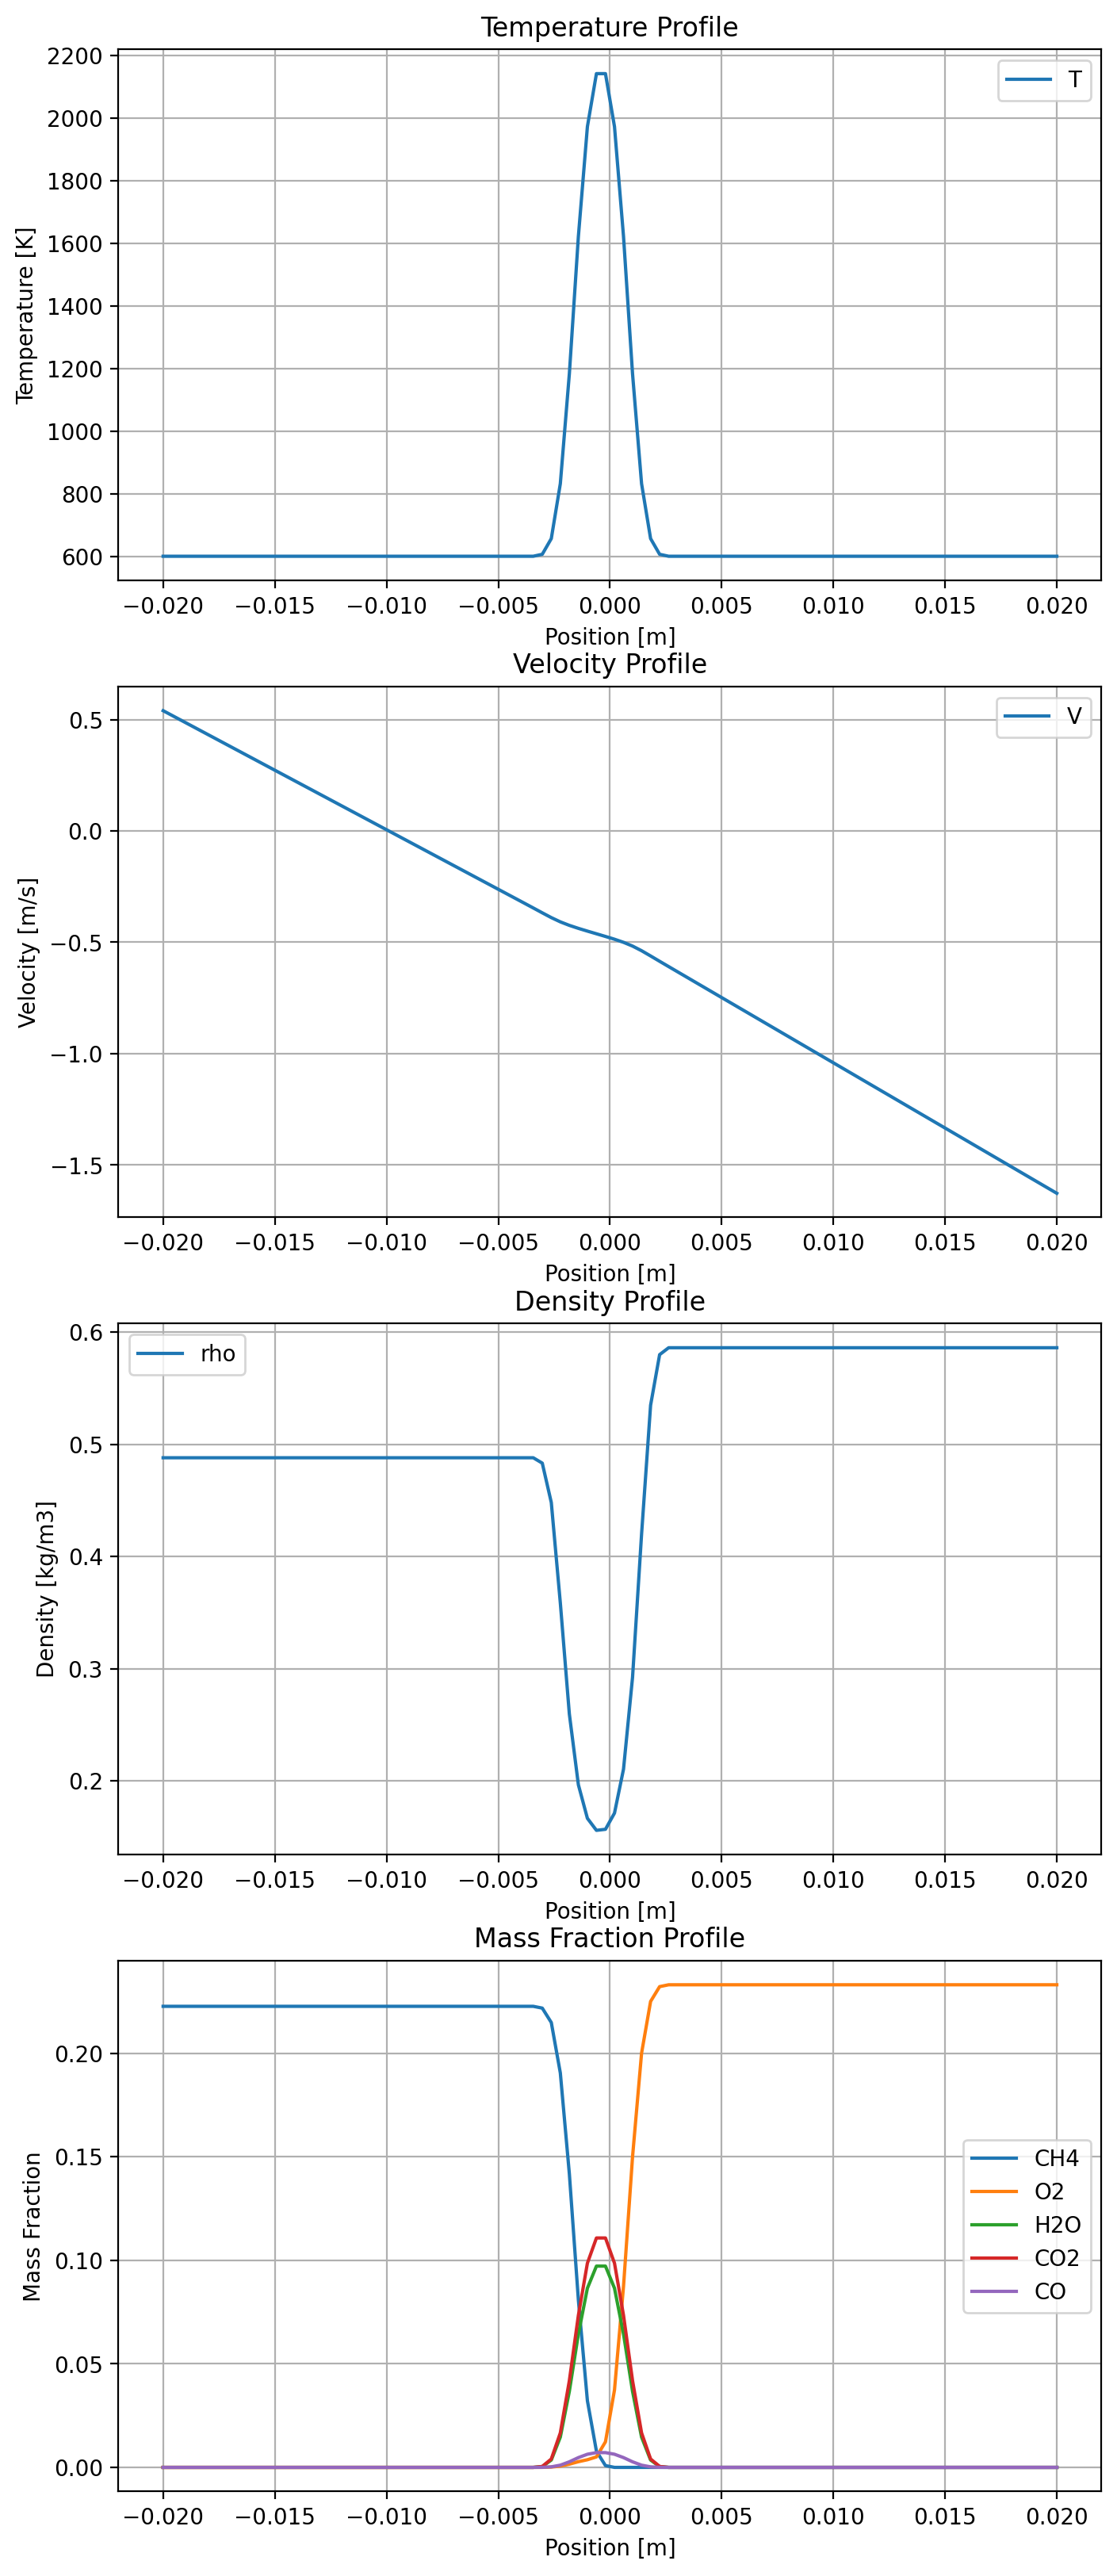

In [24]:
struct_file_2 = '../../../run/ex_diffusion1/prof000000.h5'
plot_analysis(struct_file_2, ['CH4', 'O2', 'H2O', 'CO2', 'CO'], [ch4_index, o2_index, h2o_index, co2_index, co_index])

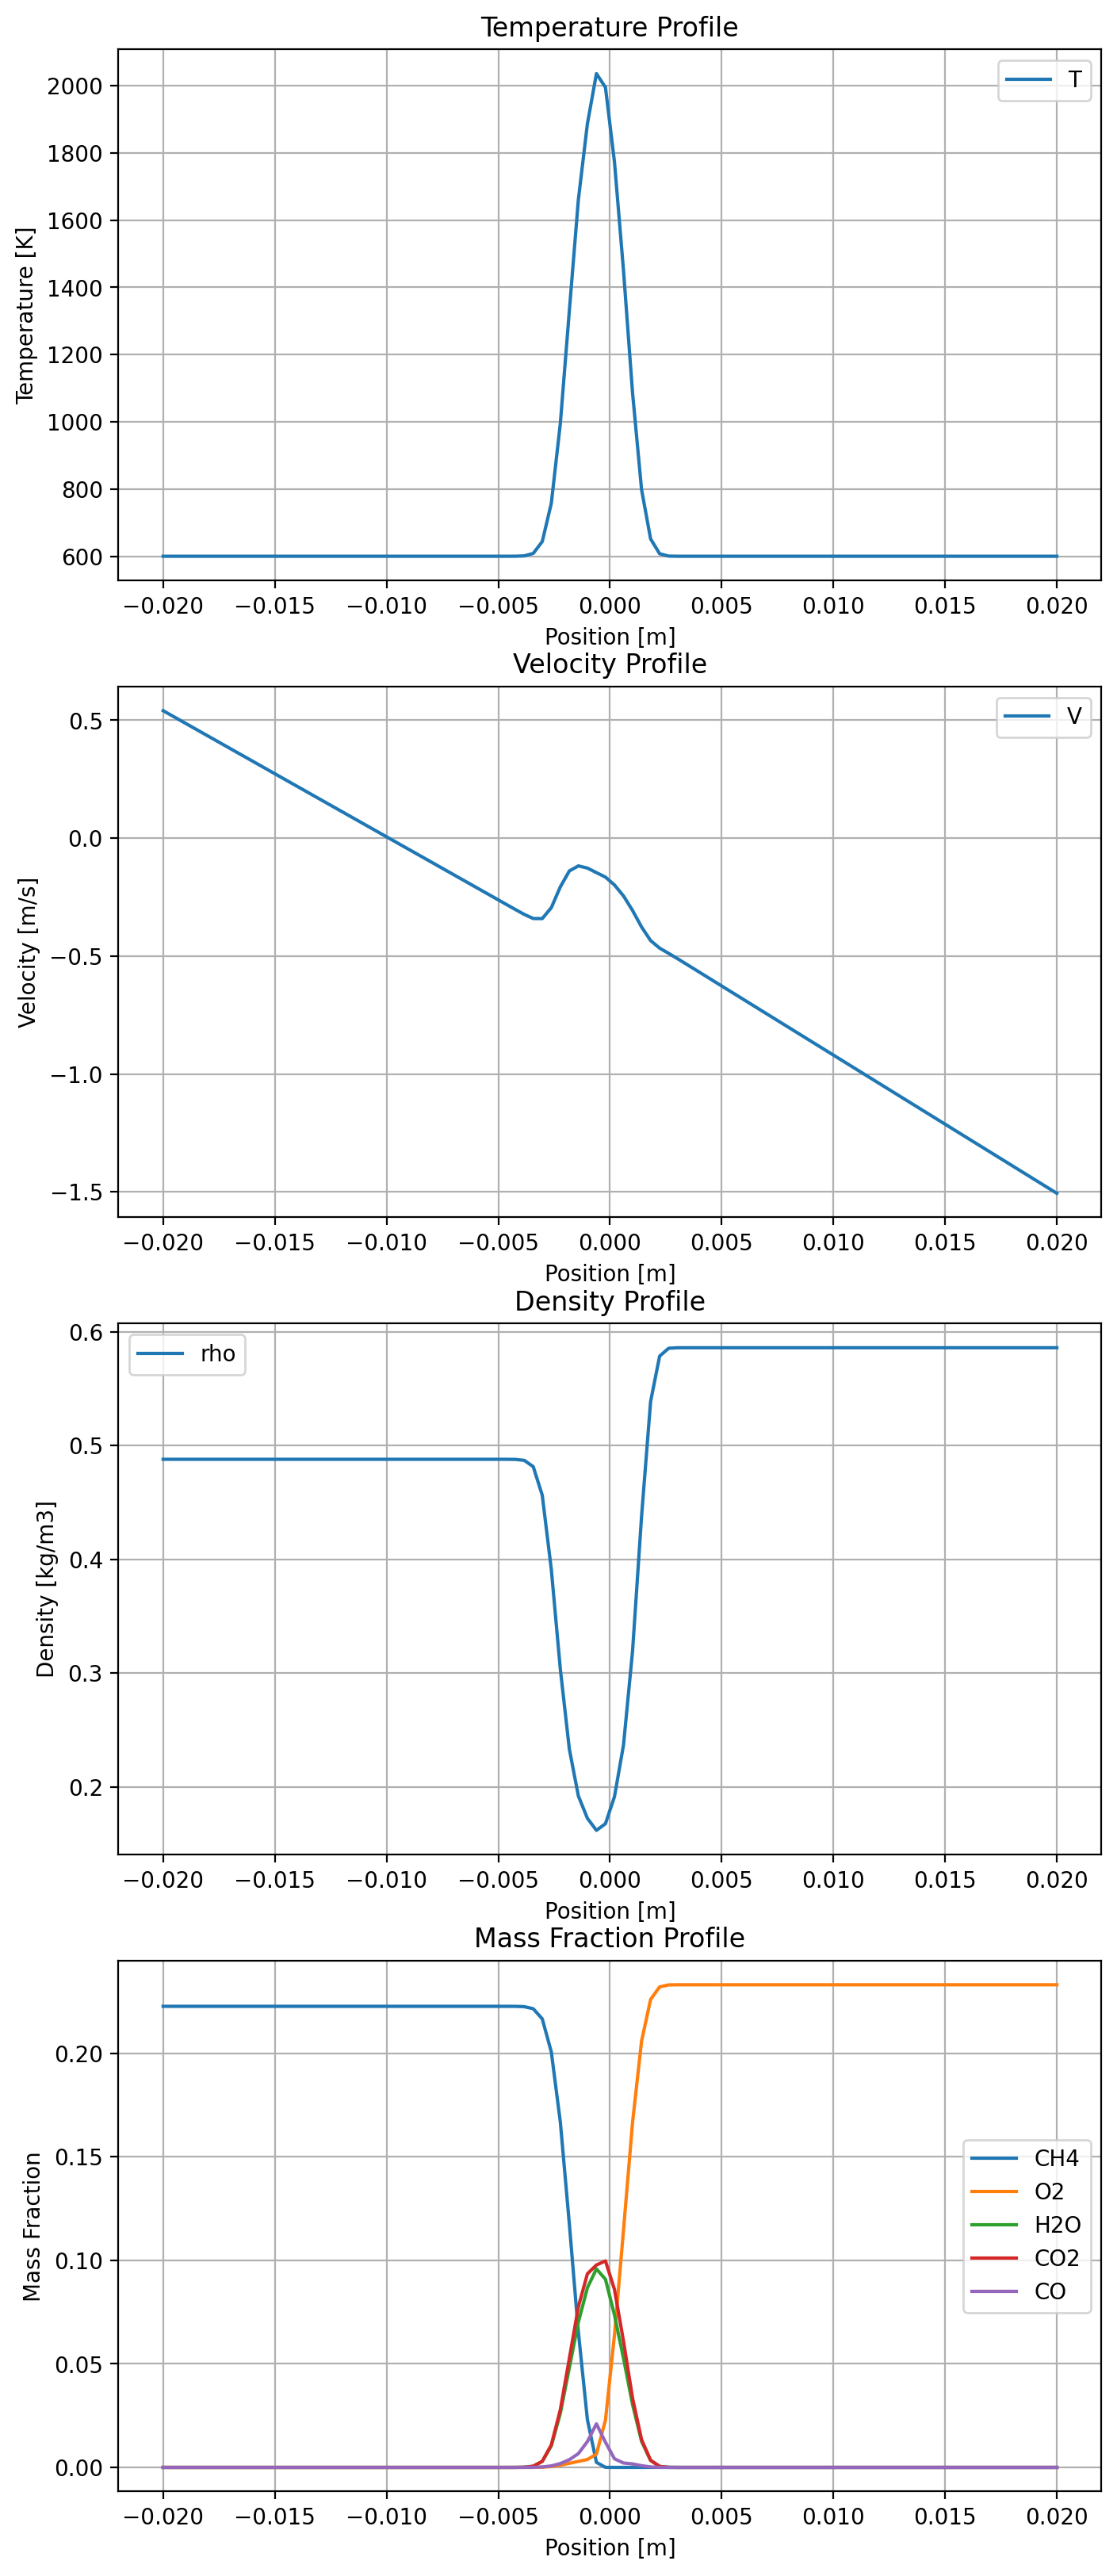

In [25]:
struct_file_3 = '../../../run/ex_diffusion1/prof000001.h5'
plot_analysis(struct_file_3, ['CH4', 'O2', 'H2O', 'CO2', 'CO'], [ch4_index, o2_index, h2o_index, co2_index, co_index])